## Preparation and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  accuracy_score, 
  classification_report, 
  confusion_matrix, 
  f1_score,
  roc_auc_score, 
  roc_curve, 
  precision_recall_curve, 
  precision_score, 
  recall_score, 
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("heart_disease.csv")
dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
dataset.dropna(axis=0,inplace=True)
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [5]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


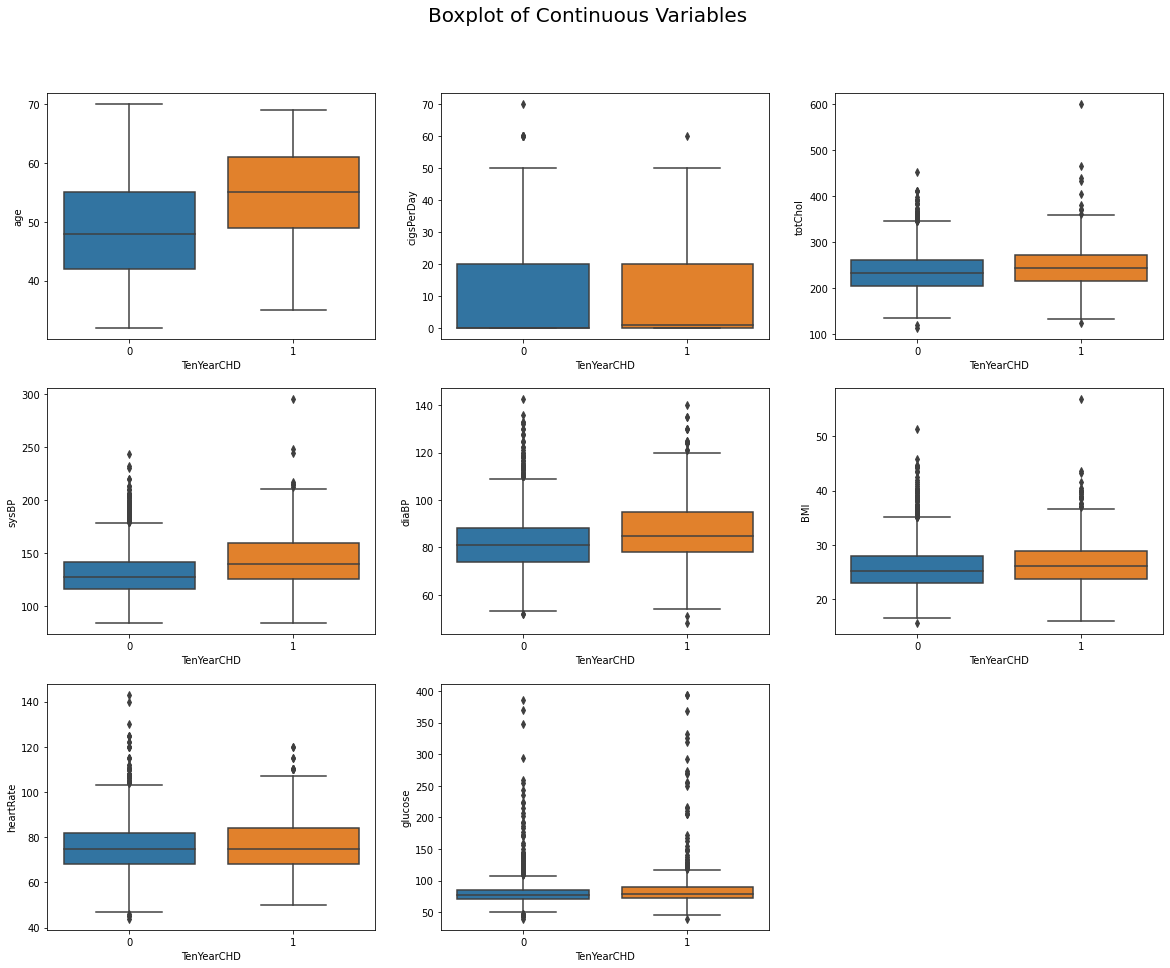

In [6]:
# Make plot boxplot for each continuous variable, grouped by TenYearCHD
variabel = 'education	currentSmoker	cigsPerDay	BPMeds	prevalentStroke	prevalentHyp	diabetes	totChol	sysBP	diaBP	BMI	heartRate	glucose	TenYearCHD'
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='TenYearCHD', y='age', data=dataset)
plt.subplot(3, 3, 2)
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=dataset)
plt.subplot(3, 3, 3)
sns.boxplot(x='TenYearCHD', y='totChol', data=dataset)
plt.subplot(3, 3, 4)
sns.boxplot(x='TenYearCHD', y='sysBP', data=dataset)
plt.subplot(3, 3, 5)
sns.boxplot(x='TenYearCHD', y='diaBP', data=dataset)
plt.subplot(3, 3, 6)
sns.boxplot(x='TenYearCHD', y='BMI', data=dataset)
plt.subplot(3, 3, 7)
sns.boxplot(x='TenYearCHD', y='heartRate', data=dataset)
plt.subplot(3, 3, 8)
sns.boxplot(x='TenYearCHD', y='glucose', data=dataset)

plt.rcParams.update({'font.size': 15})
plt.suptitle('Boxplot of Continuous Variables', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

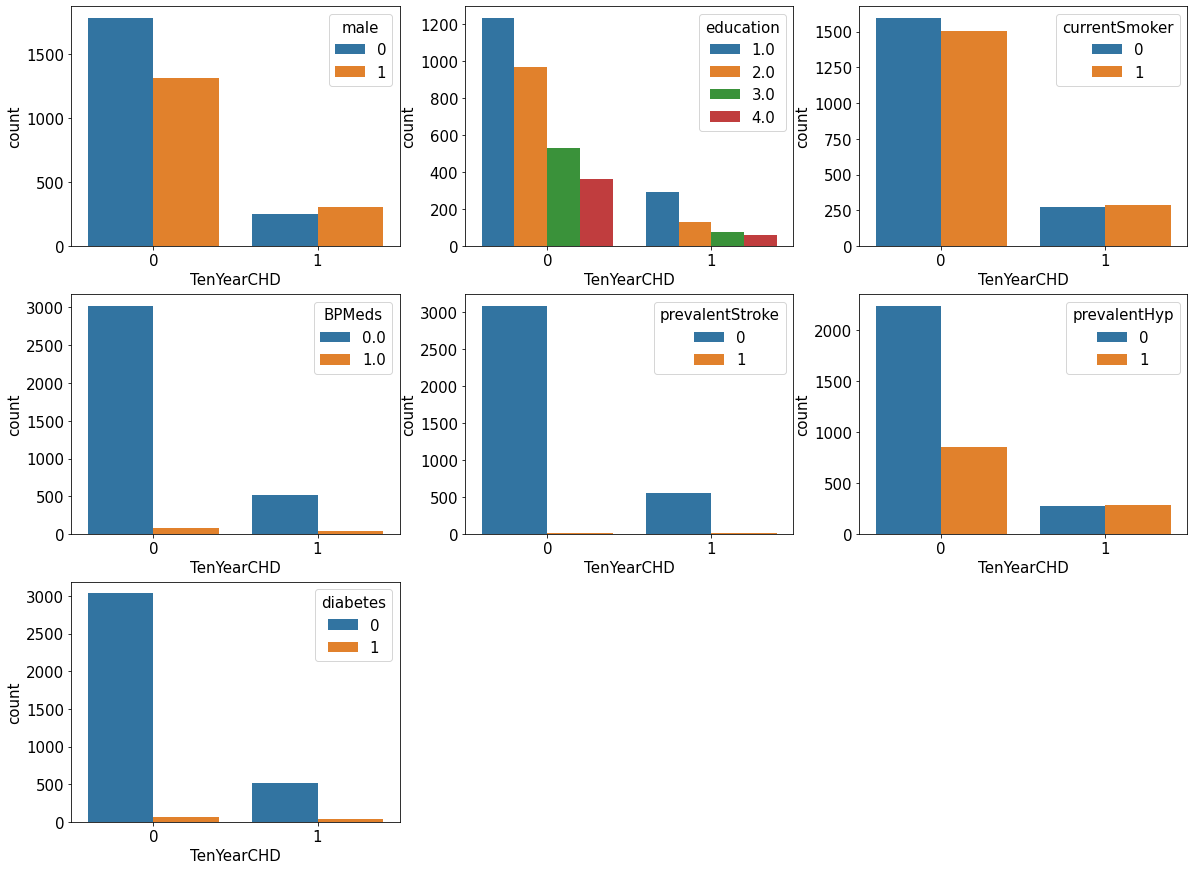

In [7]:
# Make plot countplot for each categorical variable grouped by TenYearCHD
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.countplot(x='TenYearCHD', hue='male', data=dataset)
plt.subplot(3, 3, 2)
sns.countplot(x='TenYearCHD', hue='education', data=dataset)
plt.subplot(3, 3, 3)
sns.countplot(x='TenYearCHD', hue='currentSmoker', data=dataset)
plt.subplot(3, 3, 4)
sns.countplot(x='TenYearCHD', hue='BPMeds', data=dataset)
plt.subplot(3, 3, 5)
sns.countplot(x='TenYearCHD', hue='prevalentStroke', data=dataset)
plt.subplot(3, 3, 6)
sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=dataset)
plt.subplot(3, 3, 7)
sns.countplot(x='TenYearCHD', hue='diabetes', data=dataset)

## Normalize Dataset

In [8]:
array = dataset.values
X = array[:,:-1]
Y = array[:,-1]

scaler = MinMaxScaler(feature_range=(0 ,1))
X = scaler.fit_transform(X)
Y = Y.astype(int)

In [9]:
from collections import Counter
Counter(Y)

Counter({0: 3099, 1: 557})

## Split Dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

## Binary Logit Model from All Features

In [11]:
# Logistic Regression From Original Dataset
model = LogisticRegression()
model.fit(x_train, y_train)

# Train Data Binary Logit Model from Original Data
y_pred_train_ori_all = model.predict(x_train)
train_ori_acc_all = accuracy_score(y_train, y_pred_train_ori_all)
train_ori_confusion_matrix_all = confusion_matrix(y_train, y_pred_train_ori_all)
train_ori_classification_report_all = classification_report(y_train, y_pred_train_ori_all, zero_division=0)

# Test Data Binary Logit Model from Original Data
y_pred_test_ori_all = model.predict(x_test)
prob_ori_all = model.predict_proba(x_test)[::,1]
test_ori_acc_all = accuracy_score(y_test, y_pred_test_ori_all)
test_ori_confusion_matrix_all = confusion_matrix(y_test, y_pred_test_ori_all)
test_ori_classification_report_all = classification_report(y_test, y_pred_test_ori_all)

# Logistic regression using under sampling from all features 
under = RandomUnderSampler()
x_under_all, y_under_all = under.fit_resample(x_train, y_train)

# Logistic Regression
model = LogisticRegression()
model.fit(x_under_all, y_under_all)

# Train Data Binary Logit from Under Sampling Prediction
y_pred_train_under_all = model.predict(x_under_all)
train_under_acc_all = accuracy_score(y_under_all, y_pred_train_under_all)
train_under_confusion_matrix_all = confusion_matrix(y_under_all, y_pred_train_under_all)
train_under_classification_report_all = classification_report(y_under_all, y_pred_train_under_all)

# Test Data Binary Logit from Under Sampling Prediction
y_pred_test_under_all = model.predict(x_test)
prob_under_all = model.predict_proba(x_test)[:,1]
test_under_acc_all = accuracy_score(y_test, y_pred_test_under_all)
test_under_confusion_matrix_all = confusion_matrix(y_test, y_pred_test_under_all)
test_under_classification_report_all = classification_report(y_test, y_pred_test_under_all)

## SVM Model from All Features

In [12]:
# SVM from original dataset

# Make SVM model 
SVMClassfier = svm.SVC(kernel='rbf', probability=True)
SVMClassfier.fit(x_train, y_train)

# Train Data SVM from Under Sampling Prediction
svm_y_pred_train_ori_all = SVMClassfier.predict(x_train)
svm_train_ori_acc_all = accuracy_score(y_train, svm_y_pred_train_ori_all)
svm_train_ori_confusion_matrix_all = confusion_matrix(y_train, svm_y_pred_train_ori_all)
svm_train_ori_classification_report_all = classification_report(y_train, svm_y_pred_train_ori_all)

# Test Data SVM from Under Sampling Prediction
svm_y_pred_test_ori_all = SVMClassfier.predict(x_test)
svm_y_score_train_ori = SVMClassfier.decision_function(x_test)
svm_prob_ori_all = SVMClassfier.predict_proba(x_test)[:,-1] 

svm_test_ori_acc_all = accuracy_score(y_test, svm_y_pred_test_ori_all)
svm_test_ori_confusion_matrix_all = confusion_matrix(y_test, svm_y_pred_test_ori_all)
svm_test_ori_classification_report_all = classification_report(y_test, svm_y_pred_test_ori_all)


# SVM using under sampling from all features
under = RandomUnderSampler()
x_svm_under_all, y_svm_under_all = under.fit_resample(x_train, y_train)

# Make SVM model 
SVMClassfier = svm.SVC(kernel='rbf', probability=True)
SVMClassfier.fit(x_svm_under_all, y_svm_under_all)

# Train Data SVM from Under Sampling Prediction
svm_y_pred_train_under_all = SVMClassfier.predict(x_svm_under_all)
svm_train_under_acc_all = accuracy_score(y_svm_under_all, svm_y_pred_train_under_all)
svm_train_under_confusion_matrix_all = confusion_matrix(y_svm_under_all, svm_y_pred_train_under_all)
svm_train_under_classification_report_all = classification_report(y_svm_under_all, svm_y_pred_train_under_all)

# Test Data SVM from Under Sampling Prediction
svm_y_pred_test_under_all = SVMClassfier.predict(x_test)
svm_y_score_test_ori = SVMClassfier.decision_function(x_test)
svm_prob_under_all = SVMClassfier.predict_proba(x_test)[:,-1]  

svm_test_under_acc_all = accuracy_score(y_test, svm_y_pred_test_under_all)
svm_test_under_confusion_matrix_all = confusion_matrix(y_test, svm_y_pred_test_under_all)
svm_test_under_classification_report_all = classification_report(y_test, svm_y_pred_test_under_all)

## Random Forest Model from All Features

In [13]:
# Random Forest from original dataset
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Train Data Random Forest from Original Data
rf_y_pred_train_ori_all = model.predict(x_train)
rf_train_ori_acc_all = accuracy_score(y_train, rf_y_pred_train_ori_all)
rf_train_ori_confusion_matrix_all = confusion_matrix(y_train, rf_y_pred_train_ori_all)
rf_train_ori_classification_report_all = classification_report(y_train, rf_y_pred_train_ori_all)

# Test Data Random Forest from Original Data
rf_y_pred_test_ori_all = model.predict(x_test)
rf_prob_ori_all = model.predict_proba(x_test)[:,1] 
rf_test_ori_acc_all = accuracy_score(y_test, rf_y_pred_test_ori_all)
rf_test_ori_confusion_matrix_all = confusion_matrix(y_test, rf_y_pred_test_ori_all)
rf_test_ori_classification_report_all = classification_report(y_test, rf_y_pred_test_ori_all)


# Random forest from under sampling 
under = RandomUnderSampler()
x_rf_under_all, y_rf_under_all = under.fit_resample(x_train, y_train)

model = RandomForestClassifier()
model.fit(x_rf_under_all, y_rf_under_all)

# Train data random forest from under sampling
rf_y_pred_train_under_all = model.predict(x_rf_under_all)
rf_train_under_acc_all = accuracy_score(y_rf_under_all, rf_y_pred_train_under_all)
rf_train_under_confusion_matrix_all = confusion_matrix(y_rf_under_all, rf_y_pred_train_under_all)
rf_train_under_classification_report_all = classification_report(y_rf_under_all, rf_y_pred_train_under_all)

# Test data random forest from under sampling
rf_y_pred_test_under_all = model.predict(x_test)
rf_prob_under_all = model.predict_proba(x_test)[:,1]
rf_test_under_acc_all = accuracy_score(y_test, rf_y_pred_test_under_all)
rf_test_under_confusion_matrix_all = confusion_matrix(y_test, rf_y_pred_test_under_all)
rf_test_under_classification_report_all = classification_report(y_test, rf_y_pred_test_under_all)

## Show Result All Model Performance from All Features

In [14]:
# Binary Logit from Original Dataset
print(f" Model 1 Binary Logit from Original Dataset ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {train_ori_acc_all}")
print(f"Confusion Matrix: \n{train_ori_confusion_matrix_all}")
print(f"Classification Report: \n{train_ori_classification_report_all}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {test_ori_acc_all}")
print(f"Confusion Matrix: \n{test_ori_confusion_matrix_all}")
print(f"Classification Report: \n{test_ori_classification_report_all}")

# Binary Logit from Under Sampling
print(f" Model 2 Binary Logit from Under Sampling ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {train_under_acc_all}")
print(f"Confusion Matrix: \n{train_under_confusion_matrix_all}")
print(f"Classification Report: \n{train_under_classification_report_all}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {test_under_acc_all}")
print(f"Confusion Matrix: \n{test_under_confusion_matrix_all}")
print(f"Classification Report: \n{test_under_classification_report_all}")


# SVM from Original Dataset
print(f" Model 3 SVM from Original Dataset ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_train_ori_acc_all}")
print(f"Confusion Matrix: \n{svm_train_ori_confusion_matrix_all}")
print(f"Classification Report: \n{svm_train_ori_classification_report_all}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_test_ori_acc_all}")
print(f"Confusion Matrix: \n{svm_test_ori_confusion_matrix_all}")
print(f"Classification Report: \n{svm_test_ori_classification_report_all}")

# SVM from Under Sampling
print(f" Model 4 SVM from Under Sampling ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_train_under_acc_all}")
print(f"Confusion Matrix: \n{svm_train_under_confusion_matrix_all}")
print(f"Classification Report: \n{svm_train_under_classification_report_all}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_test_under_acc_all}")
print(f"Confusion Matrix: \n{svm_test_under_confusion_matrix_all}")
print(f"Classification Report: \n{svm_test_under_classification_report_all}")


# Random Forest from Original Dataset
print(f" Model 5 Random Forest from Original Dataset ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_train_ori_acc_all}")
print(f"Confusion Matrix: \n{rf_train_ori_confusion_matrix_all}")
print(f"Classification Report: \n{rf_train_ori_classification_report_all}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_test_ori_acc_all}")
print(f"Confusion Matrix: \n{rf_test_ori_confusion_matrix_all}")
print(f"Classification Report: \n{rf_test_ori_classification_report_all}")

# Random Forest from Under Sampling
print(f" Model 6 Random Forest from Under Sampling ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_train_under_acc_all}")
print(f"Confusion Matrix: \n{rf_train_under_confusion_matrix_all}")
print(f"Classification Report: \n{rf_train_under_classification_report_all}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_test_under_acc_all}")
print(f"Confusion Matrix: \n{rf_test_under_confusion_matrix_all}")
print(f"Classification Report: \n{rf_test_under_classification_report_all}")

============================ Model 1 Binary Logit from Original Dataset ============================
-------------------------------------- Data Train Performance --------------------------------------
Accuracy Score: 0.8594391244870041
Confusion Matrix: 
[[2488    9]
 [ 402   25]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2497
           1       0.74      0.06      0.11       427

    accuracy                           0.86      2924
   macro avg       0.80      0.53      0.52      2924
weighted avg       0.84      0.86      0.80      2924

-------------------------------------- Data Test Performance ---------------------------------------
Accuracy Score: 0.8278688524590164
Confusion Matrix: 
[[600   2]
 [124   6]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       602
           1       0.75      0.05      0.09       130



## Recursive Features Elimination from Intial Logit Model with All Features

In [15]:
model = LogisticRegression()

# Reduce the number of features
rfe = RFE(model)
fit = rfe.fit(x_train, y_train)

# Recursive Feature Elimination
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(x_train, y_train)

cols = list(dataset.columns)
cols.pop()
cols = np.array(cols)
cols = cols[rfecv.support_]
cols_index = np.where(rfecv.support_ == True)[0]
cols

array(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'glucose'],
      dtype='<U15')

## Make new dataset for new model with selected features

In [16]:
# New dataset with selected features 
new_dataset = dataset.iloc[:,cols_index]
new_dataset

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0.0,0.0,0,1,0,187.0,141.0,81.0
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,79.0
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,68.0


## Normalize New Dataset

In [17]:
array = new_dataset.values
X_new = array[:,:-1]
Y_new = array[:,-1]

scaler = MinMaxScaler(feature_range=(0,1))
X_new = scaler.fit_transform(X)
Y_new = Y.astype(int)

## Split New Dataset

In [18]:
# Split the new dataset
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=12)

## Binary Logit Model from Selected Features

In [19]:
# Logistic Regression from Original Dataset with Selected Features
model = LogisticRegression()
model.fit(x_train, y_train)

# Train Data Binary Logit Model from Original Data
y_pred_train_ori_selected = model.predict(x_train)
train_ori_acc_selected = accuracy_score(y_train, y_pred_train_ori_selected)
train_ori_confusion_matrix_selected = confusion_matrix(y_train, y_pred_train_ori_selected)
train_ori_classification_report_selected = classification_report(y_train, y_pred_train_ori_selected, zero_division=0)

# Test Data Binary Logit Model from Original Data
y_pred_test_ori_selected = model.predict(x_test)
prob_ori_selected = model.predict_proba(x_test)[:,1]
test_ori_acc_selected = accuracy_score(y_test, y_pred_test_ori_selected)
test_ori_confusion_matrix_selected = confusion_matrix(y_test, y_pred_test_ori_selected)
test_ori_classification_report_selected = classification_report(y_test, y_pred_test_ori_selected)

# Logistic Regression from Under Sampling with selected features 
under = RandomUnderSampler()
x_under_selected, y_under_selected = under.fit_resample(x_train, y_train)

# Logistic Regression
model = LogisticRegression()
model.fit(x_under_selected, y_under_selected)

# Train Data Binary Logit from Under Sampling Prediction
y_pred_train_under_selected = model.predict(x_under_selected)
train_under_acc_selected = accuracy_score(y_under_selected, y_pred_train_under_selected)
train_under_confusion_matrix_selected = confusion_matrix(y_under_selected, y_pred_train_under_selected)
train_under_classification_report_selected = classification_report(y_under_selected, y_pred_train_under_selected)

# Test Data Binary Logit from Under Sampling Prediction
y_pred_test_under_selected = model.predict(x_test)
prob_under_selected = model.predict_proba(x_test)[:,1]
test_under_acc_selected = accuracy_score(y_test, y_pred_test_under_selected)
test_under_confusion_matrix_selected = confusion_matrix(y_test, y_pred_test_under_selected)
test_under_classification_report_selected = classification_report(y_test, y_pred_test_under_selected)

## SVM Model from Selected Features

In [20]:
# SVM from Original Dataset with Selected Features
under = RandomUnderSampler()

# Make SVM model 
SVMClassfier = svm.SVC(kernel='rbf', probability=True)
SVMClassfier.fit(x_train, y_train)

# Train Data SVM from Under Sampling Prediction
svm_y_pred_train_ori_selected = SVMClassfier.predict(x_train)
svm_train_ori_acc_selected = accuracy_score(y_train, svm_y_pred_train_ori_all)
svm_train_ori_confusion_matrix_selected = confusion_matrix(y_train, svm_y_pred_train_ori_all)
svm_train_ori_classification_report_selected = classification_report(y_train, svm_y_pred_train_ori_all)

# Test Data SVM from Under Sampling Prediction
svm_y_pred_test_ori_selected = SVMClassfier.predict(x_test)
svm_y_score_train_ori = SVMClassfier.decision_function(x_test)
svm_prob_ori_selected = SVMClassfier.predict_proba(x_test)[:,-1] 

svm_test_ori_acc_selected = accuracy_score(y_test, svm_y_pred_test_ori_all)
svm_test_ori_confusion_matrix_selected = confusion_matrix(y_test, svm_y_pred_test_ori_all)
svm_test_ori_classification_report_selected = classification_report(y_test, svm_y_pred_test_ori_all)


# SVM from Under Sampling with Selected Features
under = RandomUnderSampler()
x_svm_under_selected, y_svm_under_selected = under.fit_resample(x_train, y_train)

# Make SVM model 
SVMClassfier = svm.SVC(kernel='rbf', probability=True)
SVMClassfier.fit(x_svm_under_selected, y_svm_under_selected)

# Train Data SVM from Under Sampling Prediction
svm_y_pred_train_under_selected = SVMClassfier.predict(x_svm_under_all)
svm_train_under_acc_selected = accuracy_score(y_svm_under_all, svm_y_pred_train_under_all)
svm_train_under_confusion_matrix_selected = confusion_matrix(y_svm_under_all, svm_y_pred_train_under_all)
svm_train_under_classification_report_selected = classification_report(y_svm_under_all, svm_y_pred_train_under_all)

# Test Data SVM from Under Sampling Prediction
svm_y_pred_test_under_selected = SVMClassfier.predict(x_test)
svm_y_score_test_ori = SVMClassfier.decision_function(x_test)
svm_prob_under_selected = SVMClassfier.predict_proba(x_test)[:,-1]  

svm_test_under_acc_selected = accuracy_score(y_test, svm_y_pred_test_under_all)
svm_test_under_confusion_matrix_selected = confusion_matrix(y_test, svm_y_pred_test_under_all)
svm_test_under_classification_report_selected = classification_report(y_test, svm_y_pred_test_under_all)

## Random Forest Model from Selected Features

In [21]:
# Random Forest from Original Dataset with Selected Features
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Train Data Random Forest from Original Data
rf_y_pred_train_ori_selected = model.predict(x_train)
rf_train_ori_acc_selected = accuracy_score(y_train, y_pred_train_ori_selected)
rf_train_ori_confusion_matrix_selected = confusion_matrix(y_train, y_pred_train_ori_selected)
rf_train_ori_classification_report_selected = classification_report(y_train, y_pred_train_ori_selected)

# Test Data Random Forest from Original Data
rf_y_pred_test_ori_selected = model.predict(x_test)
rf_prob_ori_selected = model.predict_proba(x_test)[:,1] 
rf_test_ori_acc_selected = accuracy_score(y_test, rf_y_pred_test_ori_selected)
rf_test_ori_confusion_matrix_selected = confusion_matrix(y_test, rf_y_pred_test_ori_selected)
rf_test_ori_classification_report_selected = classification_report(y_test, rf_y_pred_test_ori_selected)


# Random forest from Under Sampling with Selected Features
under = RandomUnderSampler()
x_rf_under_selected, y_rf_under_selected = under.fit_resample(x_train, y_train)

# Make Random Forest model
model = RandomForestClassifier()
model.fit(x_rf_under_selected, y_rf_under_selected)

# Train data random forest from under sampling
rf_y_pred_train_under_selected = model.predict(x_rf_under_selected)
rf_train_under_acc_selected = accuracy_score(y_rf_under_selected, rf_y_pred_train_under_selected)
rf_train_under_confusion_matrix_selected = confusion_matrix(y_rf_under_selected, rf_y_pred_train_under_selected)
rf_train_under_classification_report_selected = classification_report(y_rf_under_selected, rf_y_pred_train_under_selected)

# Test data random forest from under sampling
rf_y_pred_test_under_selected = model.predict(x_test)
rf_prob_under_selected = model.predict_proba(x_test)[:,1]
rf_test_under_acc_selected = accuracy_score(y_test, rf_y_pred_test_under_selected)
rf_test_under_confusion_matrix_selected = confusion_matrix(y_test, rf_y_pred_test_under_selected)
rf_test_under_classification_report_selected = classification_report(y_test, rf_y_pred_test_under_selected)

## Show Result All Model Performance from Selected Features

In [22]:
# Binary Logit from Original Dataset
print(f" Model 1 Binary Logit from Original Dataset ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {train_ori_acc_selected}")
print(f"Confusion Matrix: \n{train_ori_confusion_matrix_selected}")
print(f"Classification Report: \n{train_ori_classification_report_selected}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {test_ori_acc_selected}")
print(f"Confusion Matrix: \n{test_ori_confusion_matrix_selected}")
print(f"Classification Report: \n{test_ori_classification_report_selected}")

# Binary Logit from Under Sampling
print(f" Model 2 Binary Logit from Under Sampling ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {train_under_acc_selected}")
print(f"Confusion Matrix: \n{train_under_confusion_matrix_selected}")
print(f"Classification Report: \n{train_under_classification_report_selected}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {test_under_acc_selected}")
print(f"Confusion Matrix: \n{test_under_confusion_matrix_selected}")
print(f"Classification Report: \n{test_under_classification_report_selected}")


# SVM from Original Dataset
print(f" Model 3 SVM from Original Dataset ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_train_ori_acc_selected}")
print(f"Confusion Matrix: \n{svm_train_ori_confusion_matrix_selected}")
print(f"Classification Report: \n{svm_train_ori_classification_report_selected}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_test_ori_acc_selected}")
print(f"Confusion Matrix: \n{svm_test_ori_confusion_matrix_selected}")
print(f"Classification Report: \n{svm_test_ori_classification_report_selected}")

# SVM from Under Sampling
print(f" Model 4 SVM from Under Sampling ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_train_under_acc_selected}")
print(f"Confusion Matrix: \n{svm_train_under_confusion_matrix_selected}")
print(f"Classification Report: \n{svm_train_under_classification_report_selected}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {svm_test_under_acc_selected}")
print(f"Confusion Matrix: \n{svm_test_under_confusion_matrix_selected}")
print(f"Classification Report: \n{svm_test_under_classification_report_selected}")


# Random Forest from Original Dataset
print(f" Model 5 Random Forest from Original Dataset ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_train_ori_acc_selected}")
print(f"Confusion Matrix: \n{rf_train_ori_confusion_matrix_selected}")
print(f"Classification Report: \n{rf_train_ori_classification_report_selected}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_test_ori_acc_selected}")
print(f"Confusion Matrix: \n{rf_test_ori_confusion_matrix_selected}")
print(f"Classification Report: \n{rf_test_ori_classification_report_selected}")

# Random Forest from Under Sampling
print(f" Model 6 Random Forest from Under Sampling ".center(100, "="))
print(f" Data Train Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_train_under_acc_selected}")
print(f"Confusion Matrix: \n{rf_train_under_confusion_matrix_selected}")
print(f"Classification Report: \n{rf_train_under_classification_report_selected}")

print(f" Data Test Performance ".center(100, "-"))
print(f"Accuracy Score: {rf_test_under_acc_selected}")
print(f"Confusion Matrix: \n{rf_test_under_confusion_matrix_selected}")
print(f"Classification Report: \n{rf_test_under_classification_report_selected}")

============================ Model 1 Binary Logit from Original Dataset ============================
-------------------------------------- Data Train Performance --------------------------------------
Accuracy Score: 0.8594391244870041
Confusion Matrix: 
[[2488    9]
 [ 402   25]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2497
           1       0.74      0.06      0.11       427

    accuracy                           0.86      2924
   macro avg       0.80      0.53      0.52      2924
weighted avg       0.84      0.86      0.80      2924

-------------------------------------- Data Test Performance ---------------------------------------
Accuracy Score: 0.8278688524590164
Confusion Matrix: 
[[600   2]
 [124   6]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       602
           1       0.75      0.05      0.09       130



## Make ROC Curve from All Models with All Features

In [23]:
# Roc Curve from All Features

# AUC Curve of Binary Logit 
auc_prob_ori_all = roc_auc_score(y_test, prob_ori_all)
fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_ori_all)

auc_prob_under_all = roc_auc_score(y_test, prob_under_all)
fpr2, tpr2, threshold2 = roc_curve(y_test, prob_under_all)

# AUC Curve of SVM
auc_svm_prob_ori_all = roc_auc_score(y_test, svm_prob_ori_all)
fpr3, tpr3, thresholds3 = roc_curve(y_test, svm_prob_ori_all)

auc_svm_prob_under_all = roc_auc_score(y_test, svm_prob_under_all)
fpr4, tpr4, threshold4 = roc_curve(y_test, svm_prob_under_all)

# AUC Curve of Random Forest
auc_rf_prob_ori_all = roc_auc_score(y_test, rf_prob_ori_all)
fpr5, tpr5, thresholds5 = roc_curve(y_test, rf_prob_ori_all)

auc_rf_prob_under_all = roc_auc_score(y_test, rf_prob_under_all)
fpr6, tpr6, threshold6 = roc_curve(y_test, rf_prob_under_all)

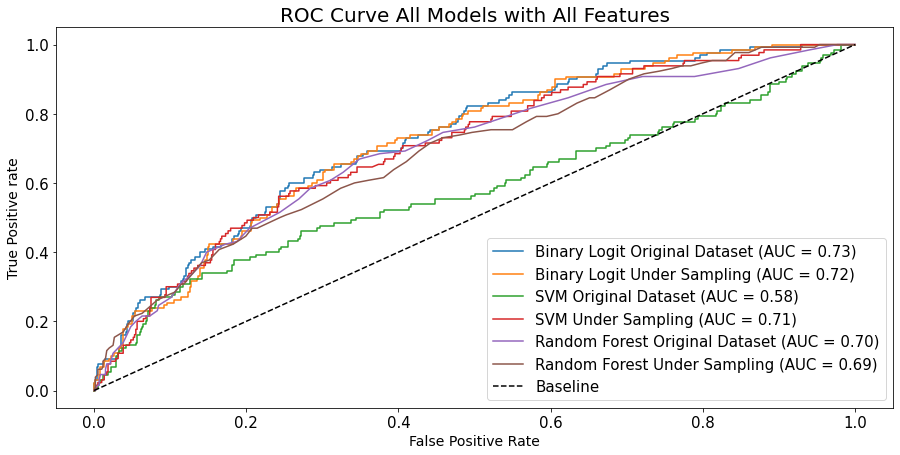

In [24]:
# Plot Roc Curve
plt.figure(figsize=(15, 7))
plt.plot(fpr1, tpr1, label=f"Binary Logit Original Dataset (AUC = {auc_prob_ori_all:.2f})")
plt.plot(fpr2, tpr2, label=f"Binary Logit Under Sampling (AUC = {auc_prob_under_all:.2f})")
plt.plot(fpr3, tpr3, label=f"SVM Original Dataset (AUC = {auc_svm_prob_ori_all:.2f})")
plt.plot(fpr4, tpr4, label=f"SVM Under Sampling (AUC = {auc_svm_prob_under_all:.2f})")
plt.plot(fpr5, tpr5, label=f"Random Forest Original Dataset (AUC = {auc_rf_prob_ori_all:.2f})")
plt.plot(fpr6, tpr6, label=f"Random Forest Under Sampling (AUC = {auc_rf_prob_under_all:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.title('ROC Curve All Models with All Features', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive rate', size=14)
plt.legend(loc='best')
plt.show()

## ROC Curve from All Models with Selected Features

In [25]:
# ROC Curve from Selected Features

# AUC Curve of Binary Logit
auc_prob_ori_selected = roc_auc_score(y_test, prob_ori_selected)
fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_ori_selected)

auc_prob_under_selected = roc_auc_score(y_test, prob_under_selected)
fpr2, tpr2, threshold2 = roc_curve(y_test, prob_under_selected)

# AUC Curve of SVM
auc_svm_prob_ori_selected = roc_auc_score(y_test, svm_prob_ori_selected)
fpr3, tpr3, thresholds3 = roc_curve(y_test, svm_prob_ori_selected)

auc_svm_prob_under_selected = roc_auc_score(y_test, svm_prob_under_selected)
fpr4, tpr4, threshold4 = roc_curve(y_test, svm_prob_under_selected)

# AUC Curve of Random Forest
auc_rf_prob_ori_selected = roc_auc_score(y_test, rf_prob_ori_selected)
fpr5, tpr5, thresholds5 = roc_curve(y_test, rf_prob_ori_selected)

auc_rf_prob_under_selected = roc_auc_score(y_test, rf_prob_under_selected)
fpr6, tpr6, threshold6 = roc_curve(y_test, rf_prob_under_selected)

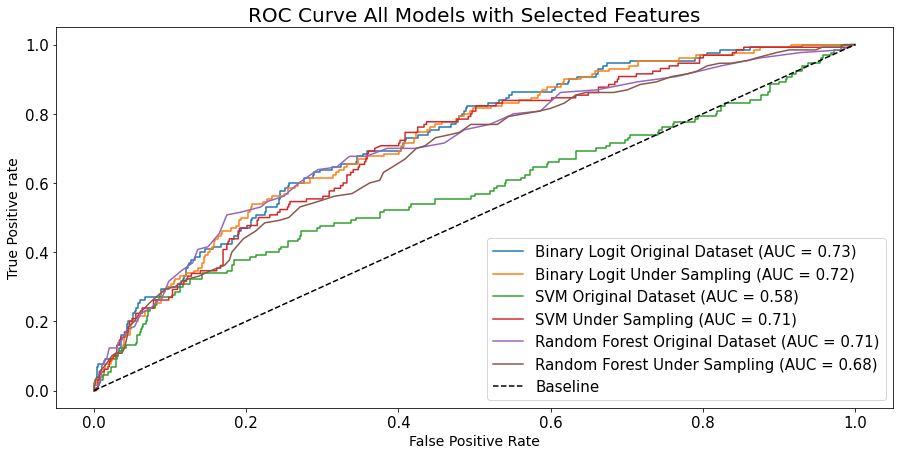

In [26]:
# Plot Roc Curve
plt.figure(figsize=(15, 7))
plt.plot(fpr1, tpr1, label=f"Binary Logit Original Dataset (AUC = {auc_prob_ori_selected:.2f})")
plt.plot(fpr2, tpr2, label=f"Binary Logit Under Sampling (AUC = {auc_prob_under_selected:.2f})")
plt.plot(fpr3, tpr3, label=f"SVM Original Dataset (AUC = {auc_svm_prob_ori_selected:.2f})")
plt.plot(fpr4, tpr4, label=f"SVM Under Sampling (AUC = {auc_svm_prob_under_selected:.2f})")
plt.plot(fpr5, tpr5, label=f"Random Forest Original Dataset (AUC = {auc_rf_prob_ori_selected:.2f})")
plt.plot(fpr6, tpr6, label=f"Random Forest Under Sampling (AUC = {auc_rf_prob_under_selected:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.title('ROC Curve All Models with Selected Features', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive rate', size=14)
plt.legend(loc='best')
plt.show()

In [27]:
# Make Table of AUC Score, Accuracy, Precision, Recall, F1 Score from All Features in Test Tes

# Binary Logit
logit_ori_all_test = [auc_prob_ori_all, accuracy_score(y_test, y_pred_test_ori_all), precision_score(y_test, y_pred_test_ori_all), recall_score(y_test, y_pred_test_ori_all), f1_score(y_test, y_pred_test_ori_all)]
logit_under_all_test = [auc_prob_under_all, accuracy_score(y_test, y_pred_test_under_all), precision_score(y_test, y_pred_test_under_all), recall_score(y_test, y_pred_test_under_all), f1_score(y_test, y_pred_test_under_all)]

# SVM
svm_ori_all_test = [auc_svm_prob_ori_all, accuracy_score(y_test, svm_y_pred_test_ori_all), precision_score(y_test, svm_y_pred_test_ori_all), recall_score(y_test, svm_y_pred_test_ori_all), f1_score(y_test, svm_y_pred_test_ori_all)]
svm_under_all_test = [auc_svm_prob_under_all, accuracy_score(y_test, svm_y_pred_test_under_all), precision_score(y_test, svm_y_pred_test_under_all), recall_score(y_test, svm_y_pred_test_under_all), f1_score(y_test, svm_y_pred_test_under_all)]

# Random Forest
rf_ori_all_test = [auc_rf_prob_ori_all, accuracy_score(y_test, rf_y_pred_test_ori_all), precision_score(y_test, rf_y_pred_test_ori_all), recall_score(y_test, rf_y_pred_test_ori_all), f1_score(y_test, rf_y_pred_test_ori_all)]
rf_under_all_test = [auc_rf_prob_under_all, accuracy_score(y_test, rf_y_pred_test_under_all), precision_score(y_test, rf_y_pred_test_under_all), recall_score(y_test, rf_y_pred_test_under_all), f1_score(y_test, rf_y_pred_test_under_all)]

# Make pandas dataframe
df_test = pd.DataFrame([logit_ori_all_test, logit_under_all_test, svm_ori_all_test, svm_under_all_test, rf_ori_all_test, rf_under_all_test], columns=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], index=['Logit Original Dataset', 'Logit Under Sampling', 'SVM Original Dataset', 'SVM Under Sampling', 'RF Original Dataset', 'RF Under Sampling'])
df_test.index.name = 'Model'

# Show Table
print('Table of AUC Score, Accuracy, Precision, Recall, F1 Score for Test Dataset with All Features')
df_test.style.background_gradient(cmap='Blues')

Table of AUC Score, Accuracy, Precision, Recall, F1 Score for Test Dataset with All Features


,AUC,Accuracy,Precision,Recall,F1 Score
Model,,,,,
Logit Original Dataset,0.727370,0.827869,0.750000,0.046154,0.086957
Logit Under Sampling,0.719729,0.653005,0.294702,0.684615,0.412037
SVM Original Dataset,0.578418,0.822404,0.500000,0.007692,0.015152
SVM Under Sampling,0.705296,0.635246,0.275410,0.646154,0.386207
RF Original Dataset,0.695132,0.823770,0.545455,0.046154,0.085106
RF Under Sampling,0.687912,0.633880,0.266892,0.607692,0.370892


In [28]:
# Make Table of AUC Score, Accuracy, Precision, Recall, F1 Score from selected Features in Test Set

# Binary Logit
logit_ori_selected_test = [auc_prob_ori_selected, accuracy_score(y_test, y_pred_test_ori_selected), precision_score(y_test, y_pred_test_ori_selected), recall_score(y_test, y_pred_test_ori_selected), f1_score(y_test, y_pred_test_ori_selected)]
logit_under_selected_test = [auc_prob_under_selected, accuracy_score(y_test, y_pred_test_under_selected), precision_score(y_test, y_pred_test_under_selected), recall_score(y_test, y_pred_test_under_selected), f1_score(y_test, y_pred_test_under_selected)]

# SVM
svm_ori_selected_test = [auc_svm_prob_ori_selected, accuracy_score(y_test, svm_y_pred_test_ori_selected), precision_score(y_test, svm_y_pred_test_ori_selected), recall_score(y_test, svm_y_pred_test_ori_selected), f1_score(y_test, svm_y_pred_test_ori_selected)]
svm_under_selected_test = [auc_svm_prob_under_selected, accuracy_score(y_test, svm_y_pred_test_under_selected), precision_score(y_test, svm_y_pred_test_under_selected), recall_score(y_test, svm_y_pred_test_under_selected), f1_score(y_test, svm_y_pred_test_under_selected)]

# Random Forest
rf_ori_selected_test = [auc_rf_prob_ori_selected, accuracy_score(y_test, rf_y_pred_test_ori_selected), precision_score(y_test, rf_y_pred_test_ori_selected), recall_score(y_test, rf_y_pred_test_ori_selected), f1_score(y_test, rf_y_pred_test_ori_selected)]
rf_under_selected_test = [auc_rf_prob_under_selected, accuracy_score(y_test, rf_y_pred_test_under_selected), precision_score(y_test, rf_y_pred_test_under_selected), recall_score(y_test, rf_y_pred_test_under_selected), f1_score(y_test, rf_y_pred_test_under_selected)]

# Make pandas dataframe
df_test_selected = pd.DataFrame([logit_ori_selected_test, logit_under_selected_test, svm_ori_selected_test, svm_under_selected_test, rf_ori_selected_test, rf_under_selected_test], columns=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], index=['Logit Original Dataset', 'Logit Under Sampling', 'SVM Original Dataset', 'SVM Under Sampling', 'RF Original Dataset', 'RF Under Sampling'])
df_test_selected.index.name = 'Model'

# Show Table
print('Table of AUC Score, Accuracy, Precision, Recall, F1 Score for Test Dataset with Selected Features')
df_test_selected.style.background_gradient(cmap='Blues')

Table of AUC Score, Accuracy, Precision, Recall, F1 Score for Test Dataset with Selected Features


,AUC,Accuracy,Precision,Recall,F1 Score
Model,,,,,
Logit Original Dataset,0.727370,0.827869,0.750000,0.046154,0.086957
Logit Under Sampling,0.723435,0.654372,0.292929,0.669231,0.407494
SVM Original Dataset,0.578418,0.822404,0.500000,0.007692,0.015152
SVM Under Sampling,0.707865,0.636612,0.287500,0.707692,0.408889
RF Original Dataset,0.706721,0.821038,0.444444,0.030769,0.057554
RF Under Sampling,0.682980,0.621585,0.259016,0.607692,0.363218


## Choosen Model (Binary Logit Model with All Features)

In [29]:
formula_ori_all = "TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay +	BPMeds + prevalentStroke + prevalentHyp +	diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose"

# Split Dataset from Original Dataset
train_ori_all, test_ori_all = train_test_split(dataset, test_size=0.2, random_state=12)

# Make Binary Logit Model from Original Dataset with All Features 
logit_model_ori_all = smf.logit(formula_ori_all, data=train_ori_all).fit()
# print(logit_model_ori_all.summary2())

# make summary2 as pd dataframe 
summary2_ori_all0 = pd.DataFrame(logit_model_ori_all.summary2().tables[0])
summary2_ori_all1 = pd.DataFrame(logit_model_ori_all.summary2().tables[1])

Optimization terminated successfully.
         Current function value: 0.366307
         Iterations 7


In [30]:
logit_model_ori_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                          Logit   Df Residuals:                     2908
Method:                           MLE   Df Model:                           15
Date:                Tue, 27 Sep 2022   Pseudo R-squ.:                  0.1190
Time:                        20:02:46   Log-Likelihood:                -1071.1
converged:                       True   LL-Null:                       -1215.7
Covariance Type:            nonrobust   LLR p-value:                 9.607e-53
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.5051      0.811    -10.484      0.000     -10.095      -6.915
male                0.5126      0.124      4.140      0.000       0.270       0.755
age                 0.0661      0.008      8.630      0.000       0.051       0.081
education          -0.0327      0.056     -0.586      0.558      -0.142       0.077
currentSmoker       0.0442      0.179      0.247      0.805      -0.306       0.394
cigsPerDay          0.0199      0.007      2.826      0.005       0.006       0.034
BPMeds              0.1828      0.268      0.682      0.495      -0.343       0.708
prevalentStroke     1.1526      0.536      2.149      0.032       0.101       2.204
prevalentHyp        0.1960      0.157      1.246      0.213      -0.112       0.504
diabetes            0.1707      0.344      0.496      0.620      -0.504       0.845
totChol             0.0023      0.001      1.777      0.076      -0.000       0.005
sysBP               0.0158      0.004      3.629      0.000       0.007       0.024
diaBP              -0.0035      0.007     -0.488      0.626      -0.018       0.011
BMI                 0.0024      0.015      0.166      0.868      -0.026       0.031
heartRate          -0.0014      0.005     -0.299      0.765      -0.011       0.008
glucose             0.0054      0.002      2.234      0.025       0.001       0.010
===================================================================================
"""